<a href="https://colab.research.google.com/github/JoannaGrunwald/data-science-bootcamp/blob/main/02_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PANDAS

In [1]:
import pandas as pd
pd.__version__

'1.3.5'

Podstawowe struktury danych: pd.Series

In [3]:
# w odróżnieniu od array mamy przypisany indeks 
s = pd.Series(data = [3,2,-1, 6])
s

0    3
1    2
2   -1
3    6
dtype: int64

In [5]:
s = pd.Series(data = [3,2,-1, 6], index = ['a','b','c','d'], name = 'sample')
s

a    3
b    2
c   -1
d    6
Name: sample, dtype: int64

In [7]:
s = pd.Series(data = [3.,2,-1, 6], index = ['a','b','c','d'], name = 'sample')
s

a    3.0
b    2.0
c   -1.0
d    6.0
Name: sample, dtype: float64

In [2]:
import numpy as np

s = pd.Series(data = [3.,np.nan,-1, 6], index = ['a','b','c','d'], name = 'sample')
s

a    3.0
b    NaN
c   -1.0
d    6.0
Name: sample, dtype: float64

In [11]:
s = pd.Series(data = [True, False, True])
s


0     True
1    False
2     True
dtype: bool

In [6]:
s = pd.Series(data = np.arange(10, 20), index=pd.date_range(start = '20200101', periods = 10, freq = 'M'))
s

2020-01-31    10
2020-02-29    11
2020-03-31    12
2020-04-30    13
2020-05-31    14
2020-06-30    15
2020-07-31    16
2020-08-31    17
2020-09-30    18
2020-10-31    19
Freq: M, dtype: int64

In [24]:
list(s.index)

[Timestamp('2020-01-31 00:00:00', freq='M'),
 Timestamp('2020-02-29 00:00:00', freq='M'),
 Timestamp('2020-03-31 00:00:00', freq='M'),
 Timestamp('2020-04-30 00:00:00', freq='M'),
 Timestamp('2020-05-31 00:00:00', freq='M'),
 Timestamp('2020-06-30 00:00:00', freq='M'),
 Timestamp('2020-07-31 00:00:00', freq='M'),
 Timestamp('2020-08-31 00:00:00', freq='M'),
 Timestamp('2020-09-30 00:00:00', freq='M'),
 Timestamp('2020-10-31 00:00:00', freq='M')]

In [7]:
s = pd.Series(data = ['python', 'java', 'sql'], name = 'languages')
s

0    python
1      java
2       sql
Name: languages, dtype: object

In [19]:
type(s)

pandas.core.series.Series

In [20]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [8]:
s.values

array(['python', 'java', 'sql'], dtype=object)

In [9]:
s.dtype

dtype('O')

In [10]:
s.shape

(3,)

In [21]:
price = pd.Series(data = {'Apple':200, 'CD Project':60, 'Amazon':1900, 'KGHM':np.nan}) # dictionary
price

Apple          200.0
CD Project      60.0
Amazon        1900.0
KGHM             NaN
dtype: float64

In [13]:
price['CD Project']

60

In [14]:
price[1]

60

In [22]:
price.count()

3

In [23]:
price.value_counts()

200.0     1
60.0      1
1900.0    1
dtype: int64

In [25]:
price.value_counts(dropna = False)

200.0     1
60.0      1
1900.0    1
NaN       1
dtype: int64

In [24]:
price.sum()

2160.0

In [18]:
price.min()

60

In [26]:
price.describe()

count       3.000000
mean      720.000000
std      1024.304642
min        60.000000
25%       130.000000
50%       200.000000
75%      1050.000000
max      1900.000000
dtype: float64

In [27]:
price.nlargest()

Amazon        1900.0
Apple          200.0
CD Project      60.0
dtype: float64

In [29]:
price.nsmallest(1)

CD Project    60.0
dtype: float64

In [30]:
price.rank()

Apple         2.0
CD Project    1.0
Amazon        3.0
KGHM          NaN
dtype: float64

In [31]:
price.sort_values() #ascending = False

CD Project      60.0
Apple          200.0
Amazon        1900.0
KGHM             NaN
dtype: float64

In [33]:
price_pln = price.apply(lambda x: x * 3.8)

In [35]:
price_pln

Apple          760.0
CD Project     228.0
Amazon        7220.0
KGHM             NaN
dtype: float64

Podstawowe struktury danych: pd.DataFrame

In [40]:
df = pd.DataFrame(data = [12,12,32], index = ['first', 'second', 'third'], columns = ['col1'])
df

,col1
first,12
second,12
third,32


In [42]:
df = pd.DataFrame(data = {'WIG20':['PKN_Orlen', 'PKO BP'],
                          'mWIG40':['Amica', 'Playway']})
df

,WIG20,mWIG40
0,PKN_Orlen,Amica
1,PKO BP,Playway


In [43]:
df = pd.DataFrame(data = [[10,12,2], [23,12,4]], index = ['first', 'second'], columns = ['col1', 'col2', 'col3'])
df

,col1,col2,col3
first,10,12,2
second,23,12,4


In [44]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [45]:
df.index

Index(['first', 'second'], dtype='object')

In [46]:
df.values

array([[10, 12,  2],
       [23, 12,  4]])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, first to second
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    2 non-null      int64
 1   col2    2 non-null      int64
 2   col3    2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [48]:
df.describe()

,col1,col2,col3
count,2.000000,2.0,2.000000
mean,16.500000,12.0,3.000000
std,9.192388,0.0,1.414214
min,10.000000,12.0,2.000000
25%,13.250000,12.0,2.500000
50%,16.500000,12.0,3.000000
75%,19.750000,12.0,3.500000
max,23.000000,12.0,4.000000


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2.0,16.5,9.192388,10.0,13.25,16.5,19.75,23.0
col2,2.0,12.0,0.000000,12.0,12.00,12.0,12.00,12.0
col3,2.0,3.0,1.414214,2.0,2.50,3.0,3.50,4.0


Selekcja kolumn

In [50]:
df

,col1,col2,col3
first,10,12,2
second,23,12,4


In [51]:
df['col1']

first     10
second    23
Name: col1, dtype: int64

In [52]:
type(df['col2'])  

pandas.core.series.Series

In [54]:
df[['col2']]

,col2
first,12
second,12


In [53]:
type(df[['col2']])

pandas.core.frame.DataFrame

In [55]:
df.columns = ['a', 'b', 'c'] #zmiana nazwy kolumn
df

,a,b,c
first,10,12,2
second,23,12,4


In [56]:
df.a #szybszy wybór kolumny, ale nie zawsze praktyczny np. przy spacji w nazwie

first     10
second    23
Name: a, dtype: int64

In [57]:
df.loc['first'] # po nazwach

a    10
b    12
c     2
Name: first, dtype: int64

In [58]:
df.iloc[0] # po indeksach

a    10
b    12
c     2
Name: first, dtype: int64

In [60]:
df.loc['first', 'b']

12

Praca z danymi

Import bibliotek

In [3]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.3.5


Załadowanie danych

In [4]:
def fetch_financial_data(company = 'AMZN'):
  """Pobiera dane dotyczące notowań spółek na giełdzie 
  według symboli na serwisie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-02-06 to 2018-02-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [5]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,102.9250,103.9484,100.6500,102.1800,81945199
2023-02-03,105.2600,108.7800,102.5200,103.3900,144374828
2023-02-02,110.2450,114.0000,108.8800,112.9100,158154243
2023-02-01,102.5300,106.2400,101.2400,105.1500,80450121
2023-01-31,101.1550,103.3484,101.1400,103.1300,66527253
...,...,...,...,...,...
2018-02-14,70.3125,72.6030,70.1680,72.5525,119040740
2018-02-13,69.2965,70.9860,69.1765,70.7255,117654340
2018-02-12,68.2335,69.6905,67.2005,69.3665,134481180


In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-02-06,102.925,103.9484,100.65,102.18,81945199
2023-02-03,105.260,108.7800,102.52,103.39,144374828
2023-02-02,110.245,114.0000,108.88,112.91,158154243
2023-02-01,102.530,106.2400,101.24,105.15,80450121
2023-01-31,101.155,103.3484,101.14,103.13,66527253


In [12]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,120.534269,121.996602,118.914278,120.464661,8.600951e+07
std,35.005556,35.373996,34.589388,34.939259,3.997418e+07
min,67.300000,69.174500,63.296500,66.980000,1.762674e+07
25%,89.470000,90.148500,88.400000,89.430500,5.897420e+07
50%,108.110000,110.990000,106.372000,108.444000,7.496474e+07
75%,158.338000,159.938000,156.250000,158.100000,1.015493e+08
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


Selekcja kolumn

In [13]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-02-06,102.925,103.9484,100.65,102.18,81945199
2023-02-03,105.260,108.7800,102.52,103.39,144374828
2023-02-02,110.245,114.0000,108.88,112.91,158154243
2023-02-01,102.530,106.2400,101.24,105.15,80450121
2023-01-31,101.155,103.3484,101.14,103.13,66527253
2023-01-30,101.090,101.7400,99.01,100.55,70691860
2023-01-27,99.530,103.4850,99.53,102.24,87775614
2023-01-26,98.235,99.4900,96.92,99.22,68523557
2023-01-25,92.560,97.2400,91.52,97.18,94261570


In [14]:
df['open'] # Series

Date
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
2023-01-25     92.560
2023-01-24     96.930
Name: open, dtype: float64

In [15]:
df.open

Date
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
2023-01-25     92.560
2023-01-24     96.930
Name: open, dtype: float64

In [16]:
df[['open']] # Data Frame

,open
Date,
2023-02-06,102.925
2023-02-03,105.260
2023-02-02,110.245
2023-02-01,102.530
2023-01-31,101.155
2023-01-30,101.090
2023-01-27,99.530
2023-01-26,98.235
2023-01-25,92.560


In [17]:
df[['open', 'close']]

,open,close
Date,,
2023-02-06,102.925,102.18
2023-02-03,105.260,103.39
2023-02-02,110.245,112.91
2023-02-01,102.530,105.15
2023-01-31,101.155,103.13
2023-01-30,101.090,100.55
2023-01-27,99.530,102.24
2023-01-26,98.235,99.22
2023-01-25,92.560,97.18


In [19]:
df.iloc[:, [0,3]]

,open,close
Date,,
2023-02-06,102.925,102.18
2023-02-03,105.260,103.39
2023-02-02,110.245,112.91
2023-02-01,102.530,105.15
2023-01-31,101.155,103.13
2023-01-30,101.090,100.55
2023-01-27,99.530,102.24
2023-01-26,98.235,99.22
2023-01-25,92.560,97.18


In [21]:
df.iloc[:, [-1]] # ostatnia kolumna

,volume
Date,
2023-02-06,81945199
2023-02-03,144374828
2023-02-02,158154243
2023-02-01,80450121
2023-01-31,66527253
2023-01-30,70691860
2023-01-27,87775614
2023-01-26,68523557
2023-01-25,94261570


In [23]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 2023-02-06 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    943 non-null    float64
 1   High    943 non-null    float64
 2   Low     943 non-null    float64
 3   Close   943 non-null    float64
 4   Volume  943 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.2 KB


In [24]:
df.describe()

,Open,High,Low,Close,Volume
count,943.000000,943.000000,943.000000,943.000000,9.430000e+02
mean,37.256849,38.026511,36.418986,37.222089,2.542331e+07
std,9.822117,9.895173,9.666544,9.759661,1.642615e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,29.710000,30.405000,29.120000,29.745000,1.569242e+07
50%,34.780000,35.340000,33.940000,34.680000,2.176605e+07
75%,44.195000,44.912500,43.390000,44.000000,3.054226e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [25]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,33.53,34.21,32.90,33.90,33594934
2023-02-03,32.17,33.95,32.15,33.09,25804879
2023-02-02,32.42,33.47,32.42,33.05,32045470
2023-02-01,30.88,31.85,30.64,31.49,21206352
2023-01-31,29.75,30.96,29.74,30.93,15611532


In [26]:
df['Average'] = (df.Open + df.Close)/2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735
2023-02-01,30.88,31.85,30.64,31.49,21206352,31.185
2023-01-31,29.75,30.96,29.74,30.93,15611532,30.340


In [27]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [29]:
df[['Close']].shift(1) # przesunięcie o jeden w dół

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2023-01-31,29.63
2023-02-01,30.93
2023-02-02,31.49


In [31]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [32]:
df['Daily_change'] = df.Close / df.Close_shift - 1 # stopa procentowa
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [34]:
df['Daily change'] = df.Close / df.Close_shift - 1 
del df['Daily change'] # usuwanie dodanej kolumny

In [36]:
df.Daily_change.min()
df.Daily_change.max()

0.3825910931174088

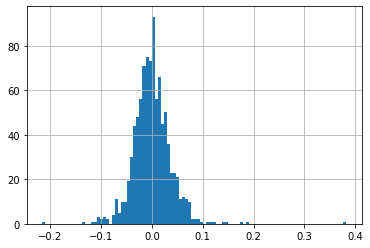

In [37]:
df.Daily_change.hist(bins = 100)

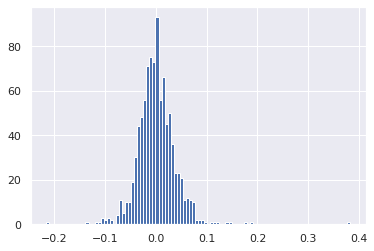

In [38]:
import seaborn as sns
sns.set()
df.Daily_change.hist(bins = 100)

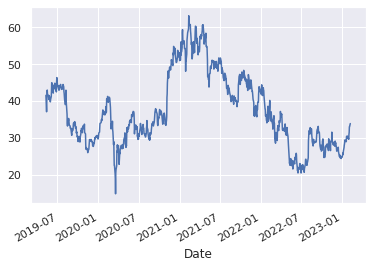

In [39]:
df.Close.plot()

Filtrowanie danych

In [45]:
# zostawiamy tylko wiersze z dodatnią stopą zwrotu
df_positive = df[df.Daily_change > 0]
df_positive.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327


In [47]:
df_positive.Daily_change.mean()

0.02794134092939793

In [49]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [50]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894


In [54]:
df[df.index > '2020-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-11-02,34.15,35.05,34.06,34.81,18350453,34.480,33.41,0.041904
2020-11-03,35.27,36.15,35.15,35.77,16208783,35.520,34.81,0.027578
2020-11-04,40.66,42.15,39.00,40.99,101818168,40.825,35.77,0.145932
2020-11-05,40.33,42.05,40.01,41.96,34177623,41.145,40.99,0.023664
2020-11-06,42.09,45.38,41.62,44.87,57670672,43.480,41.96,0.069352
...,...,...,...,...,...,...,...,...
2023-01-31,29.75,30.96,29.74,30.93,15611532,30.340,29.63,0.043874
2023-02-01,30.88,31.85,30.64,31.49,21206352,31.185,30.93,0.018105
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735,31.49,0.049540


In [56]:
df[(df.index >= '2020-11-01') & (df.index < '2020-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-11-02,34.15,35.05,34.060,34.81,18350453,34.480,33.41,0.041904
2020-11-03,35.27,36.15,35.150,35.77,16208783,35.520,34.81,0.027578
2020-11-04,40.66,42.15,39.000,40.99,101818168,40.825,35.77,0.145932
2020-11-05,40.33,42.05,40.010,41.96,34177623,41.145,40.99,0.023664
2020-11-06,42.09,45.38,41.620,44.87,57670672,43.480,41.96,0.069352
2020-11-09,48.01,49.62,47.300,48.18,61632340,48.095,44.87,0.073769
2020-11-10,46.74,49.36,46.045,47.00,33079784,46.870,48.18,-0.024491
2020-11-11,46.72,47.52,45.910,46.23,19213685,46.475,47.00,-0.016383
2020-11-12,45.39,47.47,45.050,46.40,16255467,45.895,46.23,0.003677


In [61]:
df[(df.index == '2021-11-01') | (df.index == '2021-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2021-11-01,44.07,45.025,43.65,44.36,20983925,44.215,43.82,0.012323
2021-11-15,45.11,45.260,43.56,43.61,19690003,44.360,45.12,-0.033466


In [62]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-0.093776
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,0.048094


In [63]:
df[df.index.year == 2022]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2022-01-03,42.48,44.405,41.890,43.95,26364965,43.215,41.93,0.048176
2022-01-04,44.23,44.800,42.580,44.42,30845320,44.325,43.95,0.010694
2022-01-05,44.29,45.900,42.860,43.24,28498663,43.765,44.42,-0.026565
2022-01-06,43.11,44.080,40.970,42.03,32434252,42.570,43.24,-0.027983
2022-01-07,42.00,42.650,41.200,41.51,24875831,41.755,42.03,-0.012372
...,...,...,...,...,...,...,...,...
2022-12-23,24.46,24.725,24.162,24.64,11610045,24.550,24.64,0.000000
2022-12-27,24.29,24.700,23.900,24.40,15258601,24.345,24.64,-0.009740
2022-12-28,24.21,24.720,24.020,24.59,15669206,24.400,24.40,0.007787


In [70]:
df = fetch_financial_data('IG')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,21.3400,21.3400,21.2550,21.2650,32992.0
2023-02-03,21.4900,21.4900,21.3783,21.4012,18671.0
2023-02-02,21.6900,21.6900,21.5450,21.5480,14810.0
2023-02-01,21.3600,21.5300,21.3300,21.5300,21377.0
2023-01-31,21.3401,21.4083,21.2960,21.4064,12872.0


Eksportowanie plików

In [71]:
df.to_csv('ig.csv') 

In [73]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2019)]
df_nov.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,25.2747,25.2747,25.2747,25.2747,1.016156
2019-11-26,25.3553,25.3751,25.3327,25.3327,450.156922
2019-11-25,25.2658,25.3091,25.2648,25.2747,1406.359322
2019-11-22,25.1949,25.1949,25.1949,25.1949,3.048467
2019-11-21,25.1537,25.1537,25.1537,25.1537,11.177711


In [74]:
df_nov.to_csv('ig_nov.csv')

In [76]:
new_df = pd.read_csv('ig_nov.csv')
new_df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-29,25.2747,25.2747,25.2747,25.2747,1.016156
1,2019-11-26,25.3553,25.3751,25.3327,25.3327,450.156922
2,2019-11-25,25.2658,25.3091,25.2648,25.2747,1406.359322
3,2019-11-22,25.1949,25.1949,25.1949,25.1949,3.048467
4,2019-11-21,25.1537,25.1537,25.1537,25.1537,11.177711


In [77]:
# to samo można z excel zamiast csv